In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00005.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00057.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00020.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00072.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00040.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00043.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00010.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/disco/disco00071.png
/kaggle/input/gtzan-dataset-music-genre-classification/Data/image

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import librosa
import librosa.display
import IPython.display as ipd

# Visualization / Data Exploration
Melakukan visualisasi untuk salah satu lagu pop

In [3]:
audio, sample_rate = librosa.load('/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/pop/pop.00050.wav')
print('Audio: ', audio)
print('Sample Rate: ', sample_rate)
print('Audio shape: ', audio.shape)

Audio:  [0.03704834 0.03735352 0.037323   ... 0.05224609 0.05944824 0.12362671]
Sample Rate:  22050
Audio shape:  (661504,)


In [4]:
import IPython.display as ipd

In [5]:
ipd.display(ipd.Audio(audio, rate = sample_rate))

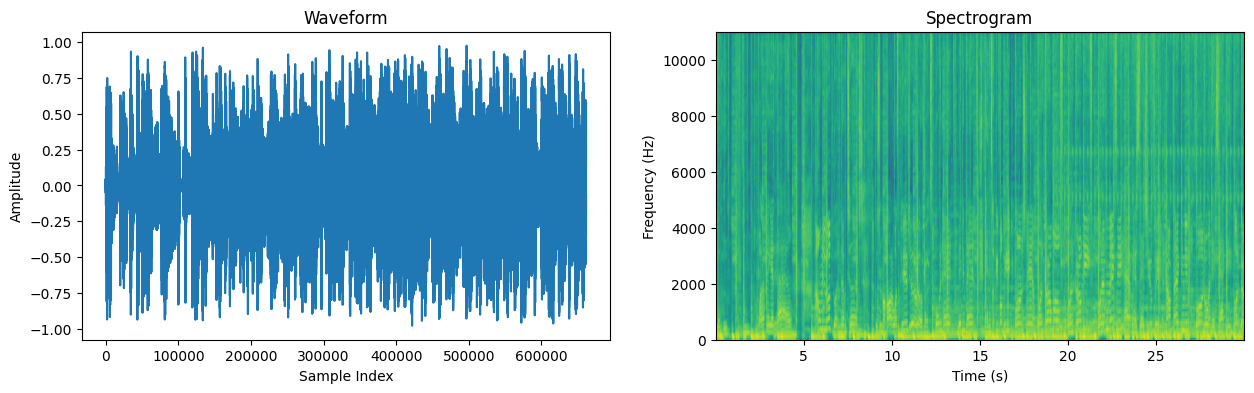

In [6]:
# Waveform
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.plot(audio)
plt.title('Waveform')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

#Spectogram
plt.subplot(1, 2, 2)
plt.specgram(audio, Fs = sample_rate)
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [7]:
df_3sec = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_3_sec.csv')
df_30sec = pd.read_csv('/kaggle/input/gtzan-dataset-music-genre-classification/Data/features_30_sec.csv')

In [8]:
df_3sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [9]:
df_30sec.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


<Axes: xlabel='label'>

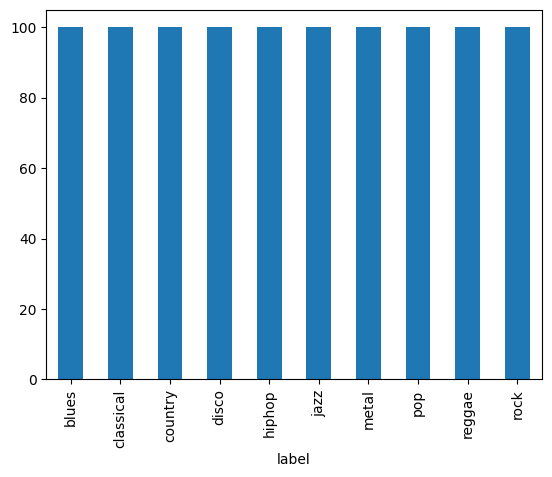

In [10]:
df_30sec.label.value_counts().plot.bar()

# Preprocessing

In [11]:
# Zero Crossing Rate 
zero_crossings = librosa.zero_crossings(audio, pad=False)
print(sum(zero_crossings))

78604


In [12]:
# Harmonics and Perceptrual
y_harmonic, y_perceptrual = librosa.effects.hpss(audio)
print('Harmonics: ', y_harmonic)
print('Harmonics shape: ', y_harmonic.shape)
print('Harmonics mean: ', y_harmonic.mean())
print('Harmonics var: ', y_harmonic.var())
print('Perceptrual: ', y_perceptrual)
print('Perceptrual shape: ', y_perceptrual.shape)
print('Perceptrual mean: ', y_perceptrual.mean())
print('Perceptrual var: ', y_perceptrual.var())

Harmonics:  [0.03326376 0.03181361 0.03337663 ... 0.01731614 0.00584044 0.02411156]
Harmonics shape:  (661504,)
Harmonics mean:  -3.5859378e-07
Harmonics var:  0.02375462
Perceptrual:  [0.00378458 0.00553991 0.00394636 ... 0.03492994 0.0536078  0.09951515]
Perceptrual shape:  (661504,)
Perceptrual mean:  -3.8225327e-05
Perceptrual var:  0.0125090685


In [13]:
# Tempo
tempo, _ = librosa.beat.beat_track(y = audio, sr = sample_rate)
tempo

143.5546875

In [14]:
# Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y = audio, sr=sample_rate)[0]
print('Spectral Centroids:', spectral_centroids)
print('Shape of Spectral Centroids:', spectral_centroids.shape)
print('Spectral Centroids mean:', spectral_centroids.mean())
print('Spectral Centroids var:', spectral_centroids.var())

Spectral Centroids: [3391.71130114 3356.69232654 2999.96114067 ... 2799.86458588 3167.67410546
 3408.82042758]
Shape of Spectral Centroids: (1293,)
Spectral Centroids mean: 3046.523748324695
Spectral Centroids var: 1375434.770051097


In [15]:
# Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
print('Spectral_bandwith:', spectral_bandwidth)
print('Spectral_bandwith shape:', spectral_bandwidth.shape)
print('Spectral_bandwith mean:', spectral_bandwidth.mean())
print('Spectral_bandwith var:', spectral_bandwidth.var())

Spectral_bandwith: [[2695.35934026 3066.73664861 3387.13577453 ... 2891.90880119
  2955.53887684 2979.12379126]]
Spectral_bandwith shape: (1, 1293)
Spectral_bandwith mean: 3095.301264191177
Spectral_bandwith var: 187018.60043077765


In [16]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y = audio, sr=sample_rate)[0]
print('Spectral Rolloff: ', spectral_rolloff)
print('Spectral Rolloff shape: ', spectral_rolloff.shape)
print('Spectral Rolloff mean: ', spectral_rolloff.mean())
print('Spectral Rolloff var: ', spectral_rolloff.var())

Spectral Rolloff:  [5932.39746094 7202.85644531 7751.953125   ... 6524.56054688 6804.4921875
 7073.65722656]
Spectral Rolloff shape:  (1293,)
Spectral Rolloff mean:  6630.777692684164
Spectral Rolloff var:  3860326.471665467


MFCC:  [[-232.74675   -125.48463    -56.231228  ...  -46.20056    -33.402805
   -31.713644 ]
 [  48.240204    44.47583     53.990505  ...   79.02171     56.27352
    54.7958   ]
 [  13.325691    22.516548    41.636967  ...  -30.524948   -13.2747345
    -1.5740416]
 ...
 [ -12.231359    -6.256031     3.6848311 ...   -8.87232     -5.096953
    -3.8704803]
 [  -9.302217     2.3334775    6.0767984 ...   -1.0246818   -4.763948
    -7.672885 ]
 [   4.2557316    6.3851395    1.1116682 ...  -12.019724    -5.4266586
    -3.7294238]]
MFCC Shape:  (20, 1293)
MFCC Mean:  4.024983
MFCC Var:  1010.4004


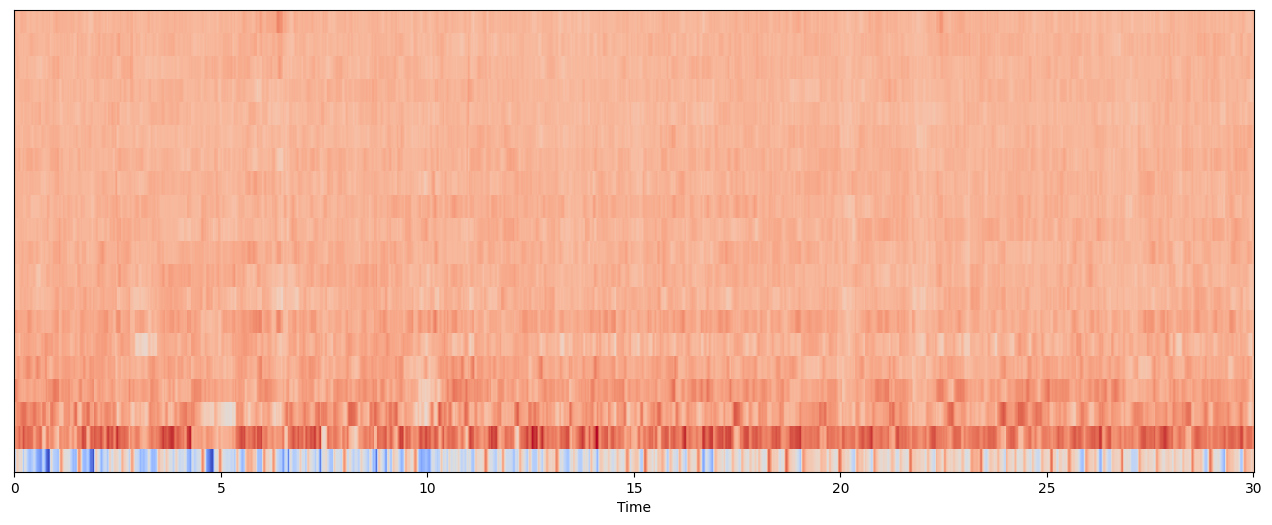

In [17]:
# MFCC
mfcc = librosa.feature.mfcc(y = audio, sr = sample_rate)
print('MFCC: ', mfcc)
print('MFCC Shape: ', mfcc.shape)
print('MFCC Mean: ', mfcc.mean())
print('MFCC Var: ', mfcc.var())
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time');

Chroma STFT:  [[0.26922175 1.         0.9347519  ... 0.03616327 0.04431113 0.0823258 ]
 [0.38681462 0.98157316 0.62157214 ... 0.04526709 0.04329918 0.07253221]
 [0.3133179  0.6611418  0.30168378 ... 0.08320016 0.03355126 0.06758653]
 ...
 [0.3326572  0.787137   0.76553816 ... 0.44905728 0.49906355 0.45342627]
 [0.2443617  0.83570063 0.9365437  ... 0.17161286 0.18509036 0.26886266]
 [0.280645   0.9497696  1.         ... 0.20805186 0.22645202 0.26260895]]
Chroma STFT shape:  (12, 1293)
Chroma STFT Mean:  0.41398925
Chroma STFT Var:  0.092015624


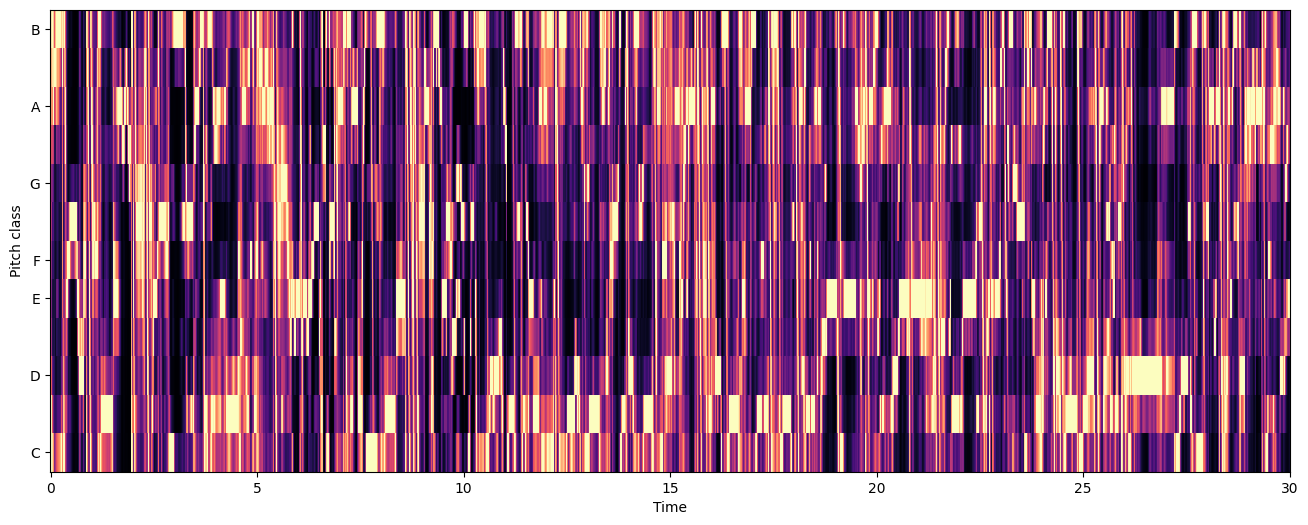

In [18]:
# Chroma Frequencies
chromagram = librosa.feature.chroma_stft(y = audio, sr = sample_rate)
print('Chroma STFT: ', chromagram)
print('Chroma STFT shape: ', chromagram.shape)
print('Chroma STFT Mean: ', chromagram.mean())
print('Chroma STFT Var: ', chromagram.var())
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')

In [19]:
# Root Mean Square(RMS)
rms = librosa.feature.rms(y=audio)
print('RMS: ', rms)
print('RMS mean: ', rms.mean())
print('RMS var: ', rms.var())

RMS:  [[0.04576159 0.16786878 0.24325636 ... 0.18133704 0.16087663 0.12838383]]
RMS mean:  0.20830256
RMS var:  0.006605225


# Modelling / Method

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [21]:
df = df_3sec
df = df.drop(columns = 'filename')
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])

In [22]:
X = df.drop(columns = ['label', 'label_encoded'])
y = df['label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
def modelling(model, title = "Default"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy', title, ':', accuracy_score(y_test, y_pred))

In [24]:
# Naive Bayes
nb = GaussianNB()
modelling(nb, "Naive Bayes")
# KNN
knn = KNeighborsClassifier(n_neighbors=19)
modelling(knn, "KNN")
# Decission trees
dtc = DecisionTreeClassifier()
modelling(dtc, "Decission trees")
# Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
modelling(rf, "Random Forest")
# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
modelling(svm, "Support Vector Machine")
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
modelling(lg, "Logistic Regression")
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
modelling(xgb, "Cross Gradient Booster")

Accuracy Naive Bayes : 0.43109776443109776
Accuracy KNN : 0.29362696029362695
Accuracy Decission trees : 0.6473139806473139
Accuracy Random Forest : 0.8134801468134801
Accuracy Support Vector Machine : 0.28995662328995664


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.30196863530196866
Accuracy Cross Gradient Booster : 0.9029029029029029


Accuracy:  0.9029029029029029
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       319
           1       0.93      0.98      0.96       308
           2       0.81      0.86      0.84       286
           3       0.87      0.89      0.88       301
           4       0.93      0.90      0.91       311
           5       0.89      0.92      0.91       286
           6       0.94      0.94      0.94       303
           7       0.90      0.95      0.93       267
           8       0.92      0.89      0.91       316
           9       0.91      0.82      0.87       300

    accuracy                           0.90      2997
   macro avg       0.90      0.90      0.90      2997
weighted avg       0.90      0.90      0.90      2997



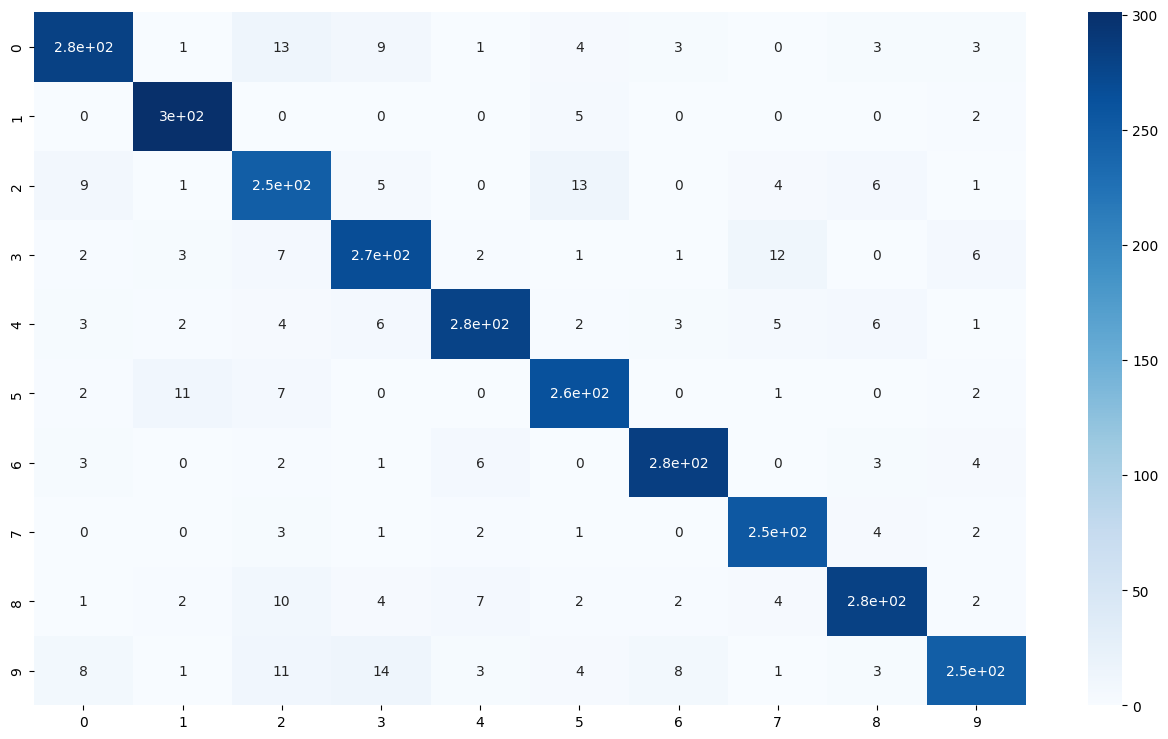

In [25]:
# Model Terbaik XGBoost
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (16, 9))
sns.heatmap(cm, cmap = 'Blues', annot=True);
print(classification_report(y_test, y_pred))

In [26]:
# Cross Validation
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(xgb, X, y, cv=kf)
print(scores)

[0.91991992 0.92492492 0.91291291 0.91691692 0.91291291 0.90590591
 0.92292292 0.90590591 0.91491491 0.91491491]
